Importando todas as bibliotecas necessárias

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from matplotlib.patches import Rectangle, FancyArrow

Definindo parâmetros iniciais da simulação e funções auxiliares

In [102]:
fs = 100000            # taxa de amostragem (Hz)
t_final = 0.05         # tempo final (s)
t = np.arange(0, t_final, 1/fs) # vetor tempo

# Sinal AM-DSB
fc_am = 1000           # frequência da portadora AM (Hz)
fm_am = 80             # frequência do modulador AM (Hz)
am_base = 2            # componente DC da envoltória AM
am_mod_amp = 1         # amplitude da componente moduladora AM

# Sinal AM-DSB-SC
fc_am_sc = 2000        # frequência da portadora AM-DSB-SC (Hz)
fm_am_sc = 80          # frequência do modulador AM-DSB-SC (Hz)
am_sc_mod_amp = 1      # amplitude do modulador (SC)

# Sinal FM
fc_fm = 5000           # frequência da portadora FM (Hz)
fm_fm = 200            # frequência do modulador FM (Hz)
phase_dev = 4          # desvio de fase (radianos) usado na expressão FM
fm_amp = 2             # amplitude do sinal FM

Agora vamos calcular os sinais para cada tipo de modulação, utilizando as variáveis definidas acima.

In [103]:
am = (am_base + am_mod_amp * np.cos(2*np.pi*fm_am*t)) * np.cos(2*np.pi*fc_am*t) # Sinal AM-DSB
am_sc = (am_sc_mod_amp *2*np.cos(2*np.pi*fm_am_sc*t)) * np.cos(2*np.pi*fc_am_sc*t) # Sinal AM-DSB-SC
fm = fm_amp * np.cos(2*np.pi*fc_fm*t + phase_dev * np.sin(2*np.pi*fm_fm*t)) # Sinal FM
fdm = fm + am_sc + am # Sinal multiplexado FDM

# Aplicando a transformada de Fourier nos sinais
normalizador = len(fdm)
AM = fft(am) / normalizador
AMSC = fft(am_sc) / normalizador
FM = fft(fm) / normalizador
FDM = fft(fdm) / normalizador

# Vetor de frequência
fs = 100000  # taxa de amostragem
frequency = fftfreq(normalizador, 1/fs)


Plotando os sinais no domínio do tempo

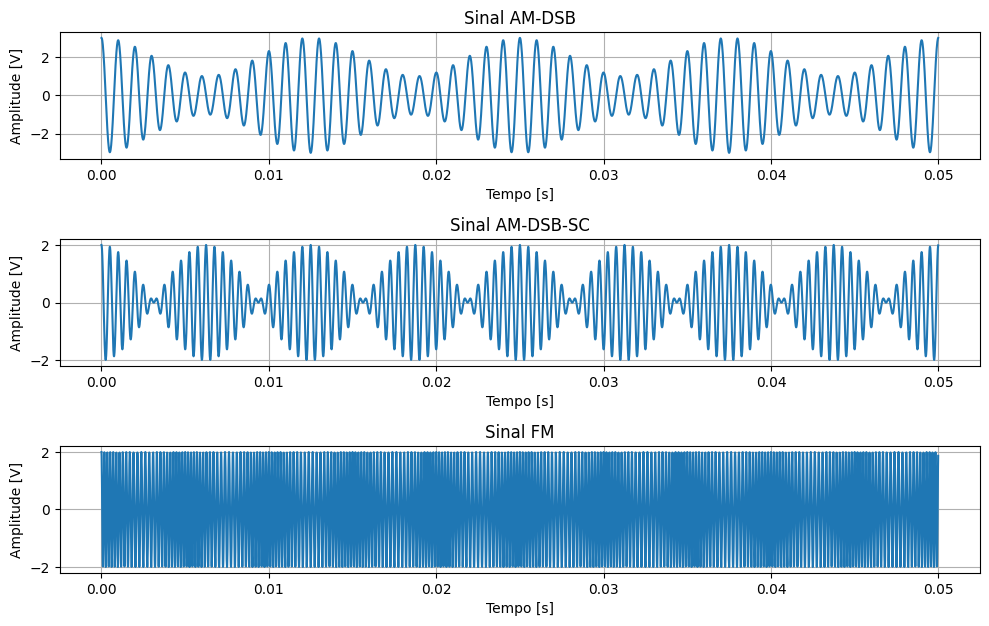

In [104]:
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(t, am)
plt.title('Sinal AM-DSB')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [V]')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(t, am_sc)
plt.title('Sinal AM-DSB-SC')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [V]')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(t, fm)
plt.title('Sinal FM')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [V]')
plt.grid(True)

plt.tight_layout()
plt.show()

Plotando os sinais no domínio da frequência

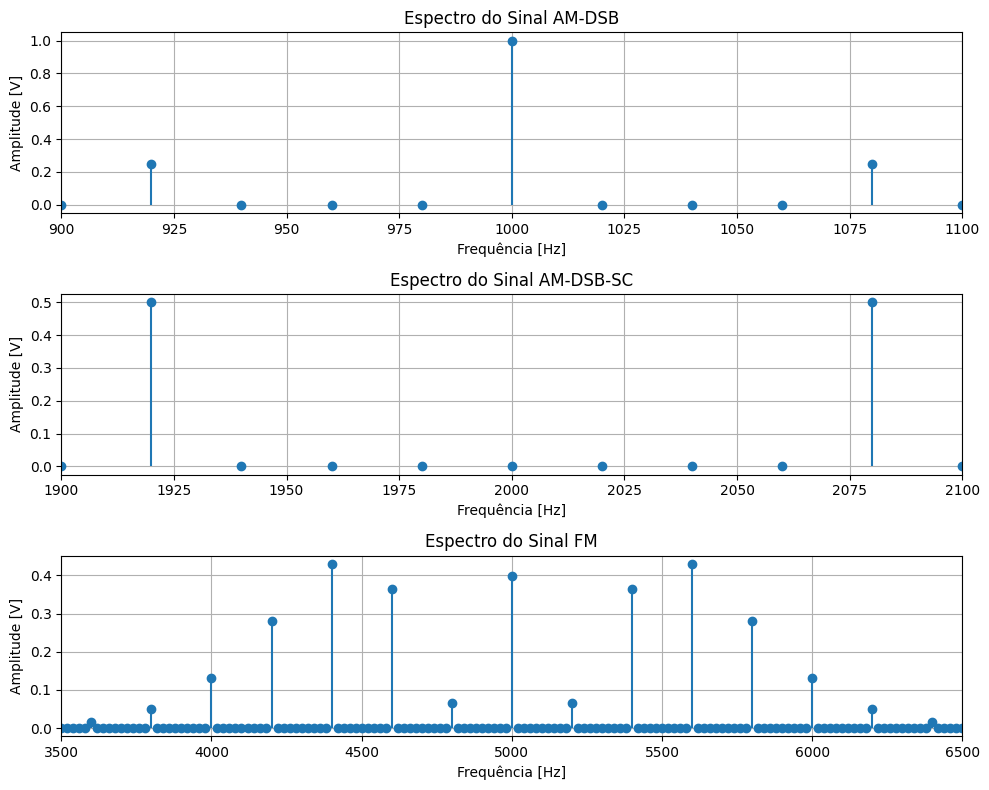

In [105]:
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.stem(frequency, np.abs(AM), basefmt=" ")
plt.title('Espectro do Sinal AM-DSB')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude [V]')
plt.xlim(900, 1100)
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(frequency, np.abs(AMSC), basefmt=" ")
plt.title('Espectro do Sinal AM-DSB-SC')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude [V]')
plt.xlim(1900, 2100)
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(frequency, np.abs(FM), basefmt=" ")
plt.title('Espectro do Sinal FM')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude [V]')
plt.xlim(3500, 6500)
plt.grid(True)

plt.tight_layout()
plt.show()

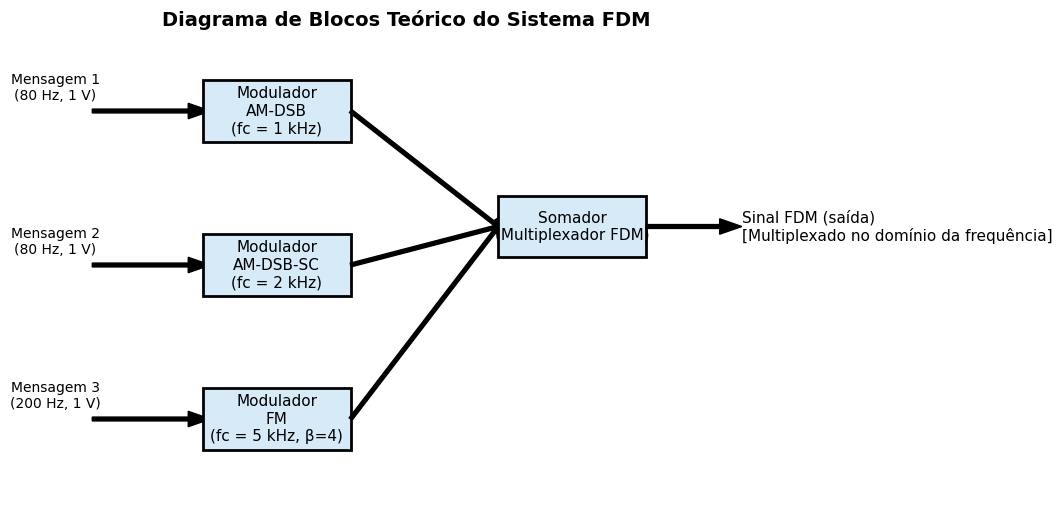

In [106]:
# Cria a figura
fig, ax = plt.subplots(figsize=(10, 6))

# Função auxiliar para desenhar blocos e setas
def bloco(x, y, text):
    ax.add_patch(Rectangle((x, y), 2, 0.8, edgecolor='black', facecolor='#D6EAF8', lw=2))
    ax.text(x + 1, y + 0.4, text, ha='center', va='center', fontsize=11)

def seta(x1, y1, x2, y2):
    ax.add_patch(FancyArrow(x1, y1, x2 - x1, y2 - y1, width=0.05, head_width=0.2, head_length=0.3, color='black'))

# --- Blocos de mensagens ---
ax.text(0, 4.3, 'Mensagem 1\n(80 Hz, 1 V)', fontsize=10, ha='center', va='center')
ax.text(0, 2.3, 'Mensagem 2\n(80 Hz, 1 V)', fontsize=10, ha='center', va='center')
ax.text(0, 0.3, 'Mensagem 3\n(200 Hz, 1 V)', fontsize=10, ha='center', va='center')

# Setas das mensagens para moduladores
seta(0.5, 4, 1.8, 4)
seta(0.5, 2, 1.8, 2)
seta(0.5, 0, 1.8, 0)

# --- Blocos de moduladores ---
bloco(2, 3.6, 'Modulador\nAM-DSB\n(fc = 1 kHz)')
bloco(2, 1.6, 'Modulador\nAM-DSB-SC\n(fc = 2 kHz)')
bloco(2, -0.4, 'Modulador\nFM\n(fc = 5 kHz, β=4)')

# Setas dos moduladores para o somador
seta(4, 4, 6, 2.5)
seta(4, 2, 6, 2.5)
seta(4, 0, 6, 2.5)

# --- Bloco de somador ---
bloco(6, 2.1, 'Somador\n(Multiplexador FDM)')

# Saída
seta(8, 2.5, 9, 2.5)
ax.text(9.3, 2.5, 'Sinal FDM (saída)\n[Multiplexado no domínio da frequência]', fontsize=11, va='center')

# --- Estética do gráfico ---
ax.set_xlim(-0.5, 10)
ax.set_ylim(-1, 5)
ax.axis('off')
ax.set_title('Diagrama de Blocos Teórico do Sistema FDM', fontsize=14, fontweight='bold')
plt.show()


Na multiplexação FDM, sinais distintos são combinados formando um único sinal. Assim, ele é transmitido e posteriormente recebido. Quem o recebe deve demultiplexa-lo, para assim recuperar cada um de seus sinais.


Plotando para o sinal multiplexado FDM

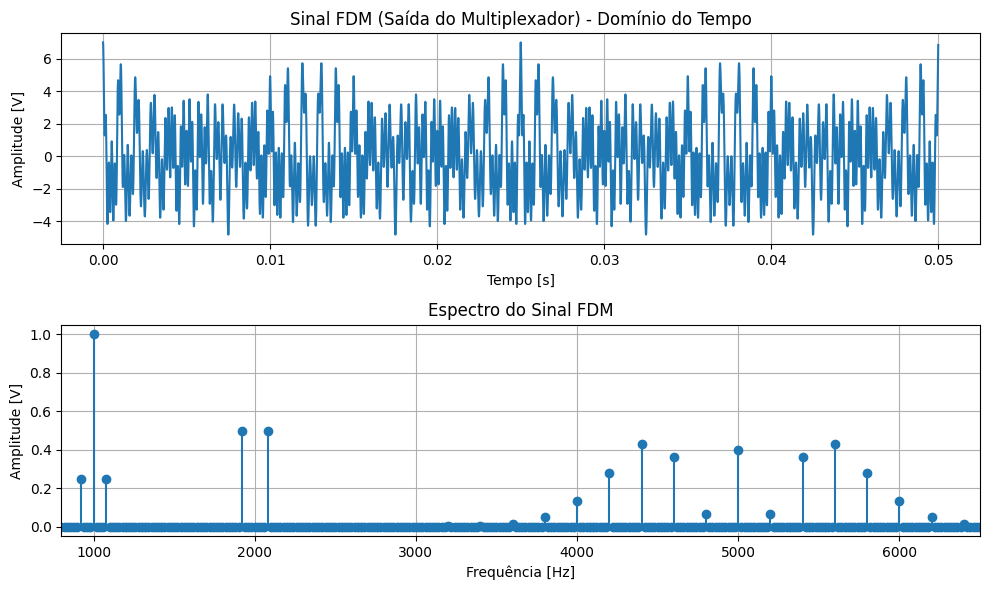

In [107]:
plt.figure(figsize=(10, 6))

# Subplot 1: domínio do tempo
plt.subplot(2, 1, 1)
plt.plot(t, fdm)
plt.title('Sinal FDM (Saída do Multiplexador) - Domínio do Tempo')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [V]')
plt.grid(True)

# Subplot 2: domínio da frequência
plt.subplot(2, 1, 2)
plt.stem(frequency, np.abs(FDM), basefmt=" ")
plt.title('Espectro do Sinal FDM')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude [V]')
plt.xlim(800, 6500)
plt.grid(True)

plt.tight_layout()
plt.show()

Desafio: Aplicar um ruido gaussiano ao sinal multiplexado FDM e observar o impacto no domínio do tempo.

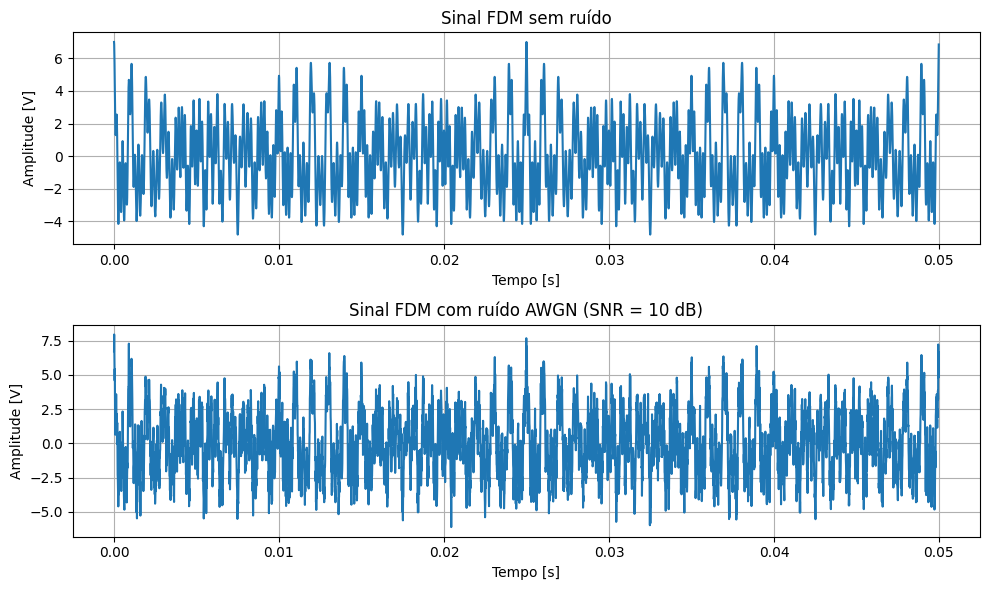

In [108]:
def add_awgn(signal, snr_db):
    # Potência do sinal
    power_signal = np.mean(signal**2)
    # Potência do ruído
    snr_linear = 10**(snr_db / 10)
    power_noise = power_signal / snr_linear
    # Geração do ruído
    noise = np.sqrt(power_noise) * np.random.randn(len(signal))
    return signal + noise

# Adiciona ruído com SNR de 10 dB
fdm_noisy = add_awgn(fdm, 10)

# Plot para comparação
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t, fdm)
plt.title('Sinal FDM sem ruído')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [V]')
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(t, fdm_noisy)
plt.title('Sinal FDM com ruído AWGN (SNR = 10 dB)')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [V]')
plt.grid(True)
plt.tight_layout()
plt.show()
